# IP Program file

### LOAD DATA FILE

In [1]:
# Importing Libraries
%matplotlib notebook
import pandas as pd
import numpy as np
import os
from config import (gkey)
import gmaps
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#CALLLING OUT CSV FILE LOCATIONS
csv_path_1 = os.path.join ("..","Resources","Census_Data_2015.csv")
csv_path_2 = os.path.join("..", "Resources","Tract_lat_lon.csv")

# READING CSV DATA INTO DATA FRAMES
HV_maindata_1_df = pd.read_csv(csv_path_1)
HV_lat_lon_tract_df = pd.read_csv(csv_path_2)

#CHECKING DATA FRAME HEADS TO ENSURE DATA IS BEING CORRECLTY READ
HV_maindata_1_df.head()
HV_lat_lon_tract_df.head()

#MERGING TWO DATA FRAMES TO GET FINAL DATAFRAME WITH CENSUS AND GEOGROPHIC INFO COMBINED
# THE INNER MERGE WILL ONLY SHOW THOSE ROWS THAT HAVE INFO IN BOTH CSV FILES. IN DOING THIS WE LOST DATA OF 25 TRACT WHICH DID NOT HAVE LAT LONGS

HV_final_df = pd.merge(HV_maindata_1_df, HV_lat_lon_tract_df, on='CENSUSTRACT', how = 'inner')

#CHECKING DATA FRAME SHAPE TO SEE HOW MANY ROWS AND COLUMNS ARE THERE. 
#THIS HV_final_df IS THE DATA FRAME THAT CAN BE USED BY ALL TEAM MEMBERS FOR THEIR INDIVIDUAL PROCESSING


#OUTPUT THE FINAL DATA FRAME WITH LAT LON + CENSUS DATA INTO CSV FILE IN OUTPUT FOLDER
HV_final_df.to_csv(os.path.join("..","Output", "Census_data_and_lat_lon.csv"), encoding = "utf-8", index = False)
HV_final_df.head()

,CENSUSTRACT,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractOMultir,TractHispanic,TractHUNV,TractSNAP,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,LAT,LON
0,1001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,...,45,44,26,112,9817813.0,28435,3.791,0.011,32.481959,-86.491338
1,1001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,...,55,75,87,202,3325680.0,5669,1.284,0.002,32.475758,-86.472468
2,1001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,...,117,87,108,120,5349273.0,9054,2.065,0.003,32.474024,-86.459703
3,1001020400,Alabama,Autauga,1,4386,1722,0,0,0.000000,0,...,74,85,19,82,6384276.0,8408,2.465,0.003,32.471030,-86.444835
4,1001020500,Alabama,Autauga,1,10766,4082,0,181,0.016812,0,...,310,355,198,488,11408866.0,43534,4.405,0.017,32.458922,-86.421826


### GEOMAPPING CENSUS FOOD DESERT DATA

In [3]:
# # CONFIGURING GMAP WITH API KEYS

# gmaps.configure (api_key = gkey)

In [4]:
# ##GETTING TWO VARIABLES FROM MAIN DATAFRAME - (A) LAT LON AND (B) FOOD DESERT SCORE

# HV_location = HV_final_df [["LAT", "LON"]]
# HV_FD_Score = HV_final_df ["fd_score"]

In [5]:
# ##CREATING FOOD DESERT HEATMAP LAYER

# # CREATE THE MAP
# HV_fig = gmaps.figure()

# # CREATE HEATMAP LAYER USING HV_LOCATION AND HV_FD_SCORE (FOOD DESERT SCORE)
# HV_heat_layer = gmaps.heatmap_layer(HV_location, weights=HV_FD_Score*3, 
#                                  dissipating=False, max_intensity=9,
#                                  point_radius=0.2)
# # Add heatmap layer to figure
# HV_fig.add_layer(HV_heat_layer)

# # Display the figure
# HV_fig

### NORMALIZING DATA FOR TOTAL HOUSING UNITS AND TOTAL POPULATION
#### HUNVnorm = normalized Housing Units Without Vehicle

In [6]:
ip_final_df = HV_final_df.copy()

In [7]:
ip_final_df = ip_final_df[ip_final_df["OHU2010"] !=0]
ip_final_df = ip_final_df[ip_final_df["POP2010"] !=0]
ip_final_df["HUNVnorm"] = ip_final_df["TractHUNV"]/ip_final_df["OHU2010"]*1000
ip_final_df["LOWInorm"] = ip_final_df["TractLOWI"]/ip_final_df["POP2010"]*1000
ip_final_df.to_csv(os.path.join("..","Output", "Normalized_Data.csv"), encoding = "utf-8", index = False)
ip_final_df.head()

,CENSUSTRACT,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractHUNV,TractSNAP,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,LAT,LON,HUNVnorm,LOWInorm
0,1001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,...,26,112,9817813.0,28435,3.791,0.011,32.481959,-86.491338,37.518038,234.309623
1,1001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,...,87,202,3325680.0,5669,1.284,0.002,32.475758,-86.472468,117.092867,351.612903
2,1001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,...,108,120,5349273.0,9054,2.065,0.003,32.474024,-86.459703,85.987261,467.832790
3,1001020400,Alabama,Autauga,1,4386,1722,0,0,0.000000,0,...,19,82,6384276.0,8408,2.465,0.003,32.471030,-86.444835,11.033682,282.945736
4,1001020500,Alabama,Autauga,1,10766,4082,0,181,0.016812,0,...,198,488,11408866.0,43534,4.405,0.017,32.458922,-86.421826,48.505634,250.046443


### GROUPING DATA BY STATES WITH FDS1 VS  FDS3

#### 5 STATES WITH HIGHEST HUNVnorm FOR FDS1

In [18]:
# Getting data for states with food desert score 1
ip_fd1_5state_df = ip_final_df[ip_final_df['fd_score'] == 1]
ip_fd1_5state_df = ip_fd1_5state_df.groupby(['State']).sum()
ip_fd1_5state_df = ip_fd1_5state_df.reset_index()
ip_fd1_5state_df.to_csv(r'../Resources/States_fdscore1.csv',index=False, header=True)
ip_fd1_5state_df = ip_fd1_5state_df.sort_values(by=["HUNVnorm"], ascending=False)

In [19]:
# Keep 5 top states in the dataframe
ip_fd1_5state_df = ip_fd1_5state_df[: 5]
# ip_fd0_5state_df

<IPython.core.display.Javascript object>


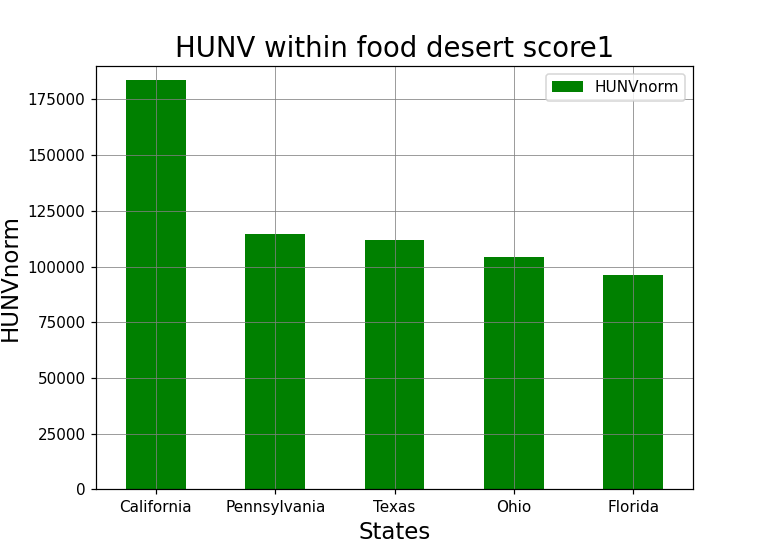

In [20]:
# Plotting barplot for top 5 states with HUNVnorm in food desert score 1
ip_fd1_xval = ip_fd1_5state_df[["State","HUNVnorm"]]
x_fd1_axis = np.arange(len(ip_fd1_xval))
ip_fd1_xval.plot(kind='bar', figsize=(7,5), color = 'green', alpha = 1)
plt.grid(linestyle='-',linewidth='0.5', color='grey')
tick_locations = [state for state in x_fd1_axis]
plt.xticks(tick_locations, ip_fd1_xval['State'], rotation='horizontal')
plt.title('HUNV within food desert score1', fontsize = 18)
plt.xlabel("States", fontsize = 15)
plt.ylabel("HUNVnorm", fontsize = 15)
plt.ylim(0, 190000)
plt.show()

# Save the figure
plt.savefig(os.path.join("..","output","5states_fd1.png"))

#### 5 STATES WITH HIGHEST HUNVnorm FOR FDS3

In [21]:
# Getting data for states with food desert score 3
ip_fd3_5state_df = ip_final_df[ip_final_df['fd_score'] == 3]
ip_fd3_5state_df = ip_fd3_5state_df.groupby(['State']).sum()
ip_fd3_5state_df = ip_fd3_5state_df.reset_index()
ip_fd3_5state_df.to_csv(r'../Resources/States_fdscore0.csv',index=False, header=True)
ip_fd3_5state_df = ip_fd3_5state_df.sort_values(by=["HUNVnorm"], ascending=False)

In [22]:
ip_fd3_5state_df = ip_fd3_5state_df[: 5]
# ip_fd3_5state_df

<IPython.core.display.Javascript object>


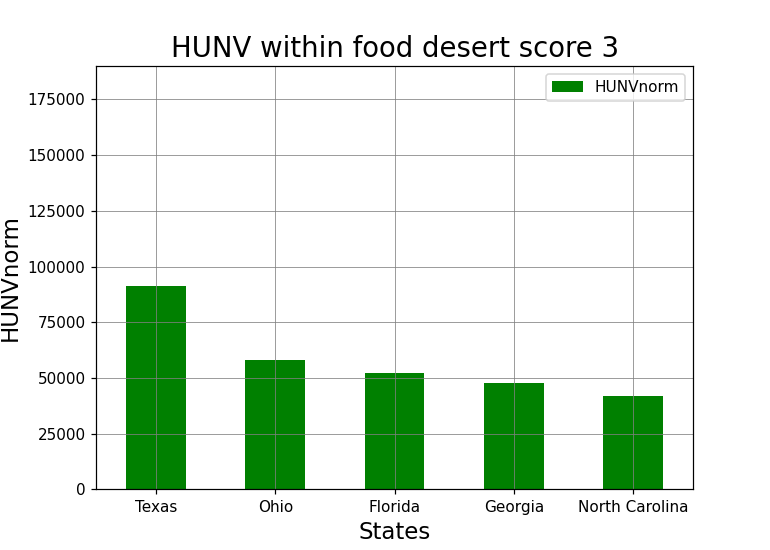

In [23]:
ip_fd3_xval = ip_fd3_5state_df[["State","HUNVnorm"]]
x_fd3_axis = np.arange(len(ip_fd3_xval))
ip_fd3_xval.plot(kind='bar', figsize=(7,5), color = 'green', alpha = 1)
plt.grid(linestyle='-',linewidth='0.5', color='grey')
tick_locations = [state for state in x_fd3_axis]
plt.xticks(tick_locations, ip_fd3_xval['State'], rotation='horizontal')
plt.title('HUNV within food desert score 3', fontsize = 18)
plt.xlabel("States", fontsize = 15)
plt.ylabel("HUNVnorm", fontsize = 15)
plt.ylim(0, 190000)
plt.show()

# Save the figure
plt.savefig(os.path.join("..","output","5states_fd3.png"))

## DATA EXPLORATION USING "HUNVnorm" COLUMN PER FDS

In [24]:
ip_fd1 = ip_final_df[ip_final_df['fd_score'] == 1]
ip_fd2 = ip_final_df[ip_final_df['fd_score'] == 2]
ip_fd3 = ip_final_df[ip_final_df['fd_score'] == 3]

<IPython.core.display.Javascript object>


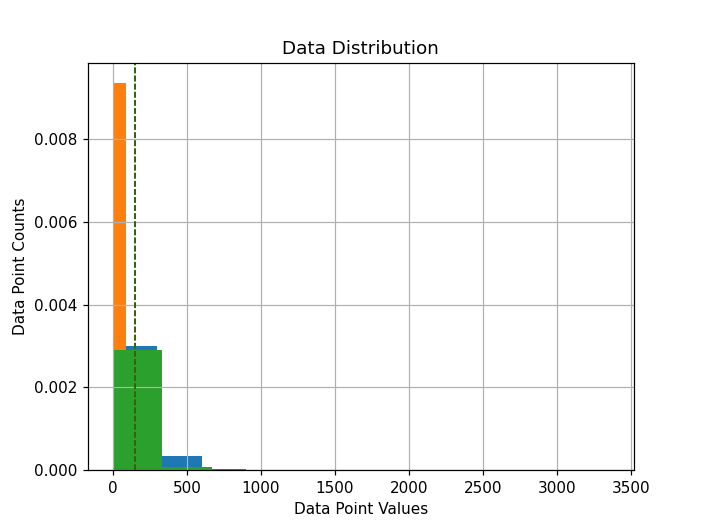

Data distrubution for HUNV is not normal but following Poisson model instead. 
In this case LinReggr and TTest is not the best option to obtain data driven 
desicions but still can be used for demonstation purposes


In [25]:
# Plotting data distribution plot for food desert score 1
ip_fd1['HUNVnorm'].hist(density=True)
ip_fd2['HUNVnorm'].hist(density=True)
ip_fd3['HUNVnorm'].hist(density=True)
plt.axvline(ip_fd1['HUNVnorm'].mean(), color='darkblue', linestyle='dashed', linewidth=1)
plt.axvline(ip_fd1['HUNVnorm'].mean(), color='darkorange', linestyle='dashed', linewidth=1)
plt.axvline(ip_fd1['HUNVnorm'].mean(), color='darkgreen', linestyle='dashed', linewidth=1)
plt.xlabel("Data Point Values")
plt.ylabel("Data Point Counts")
plt.title("Data Distribution")

print(f"Data distrubution for HUNV is not normal but following Poisson model instead. \nIn this case LinReggr and TTest is not the best option to obtain data driven \ndesicions but still can be used for demonstation purposes")
plt.show()

plt.savefig(os.path.join("..","output","Data_Distribution.png"))

## LinRegress Analysis
### LinRegress Analysis for areas with FDS1 and Low Income Population

<IPython.core.display.Javascript object>


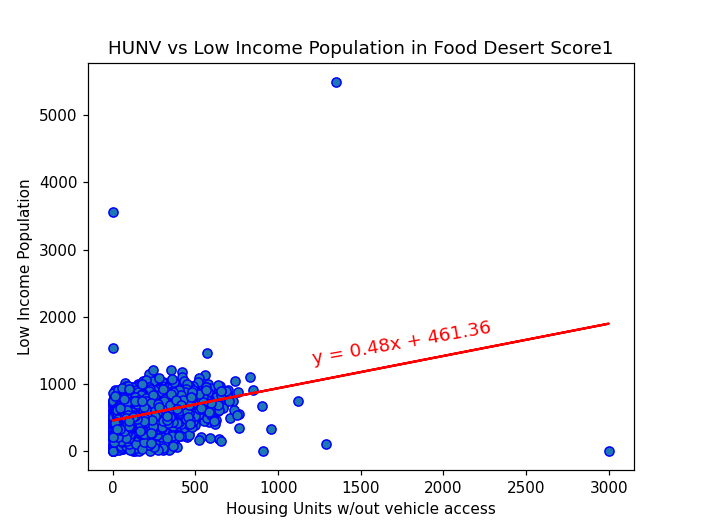

R-Squared is 0.11
Correlation is 0.33
P-Value is 2.0716701047036987e-292
Scatter plot shows positive correlation


In [26]:
# Correlation between Housing Units w/out Vehicle and Low Income Population (Food Desert Score 1)

x = ip_fd1["HUNVnorm"]
y = ip_fd1["LOWInorm"]
plt.scatter(x,y, marker="o", edgecolors="blue")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x,y)
s_regress = x*slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
r_sqr = rvalue**2

# Plotting regression line and equation
plt.plot(x, s_regress, "r-")
plt.annotate(line_eq, (1200,1300), fontsize = 12, color = "red", rotation=10)
plt.xlabel("Housing Units w/out vehicle access")
plt.ylabel("Low Income Population")
plt.title("HUNV vs Low Income Population in Food Desert Score1")


print(f"R-Squared is {round(r_sqr,2)}")
print(f"Correlation is {round(rvalue,2)}")
print(f"P-Value is {pvalue}")
print(f"Scatter plot shows positive correlation")

plt.savefig(os.path.join("..","output","fd_score1 HUNV vs Low Income Population.png"))

### LinRegress Analysis for areas with FDS3 and Low Income Population

<IPython.core.display.Javascript object>


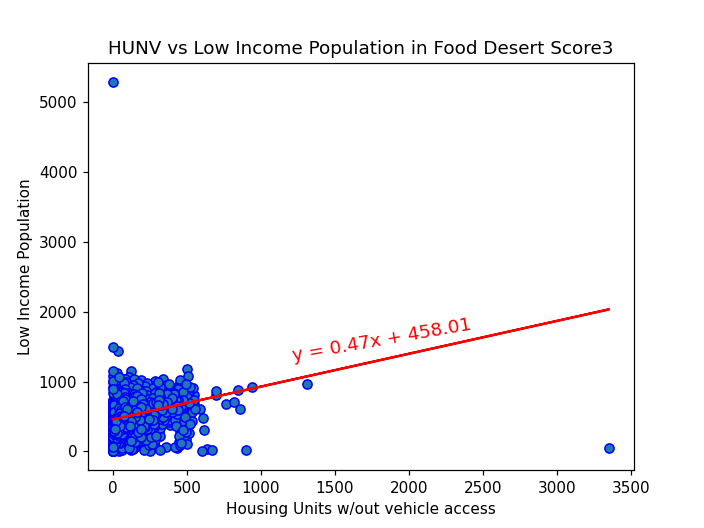

R-Squared is 0.08
Correlation is 0.27
P-Value is 2.6950522686053393e-139
Scatter plot shows positive correlation


In [27]:
# Correlation between Housing Units w/out Vehicle and Low Income Population (Food Desert Score 3)

x = ip_fd3["HUNVnorm"]
y = ip_fd3["LOWInorm"]
plt.scatter(x,y, marker="o", edgecolors="blue")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x,y)
s_regress = x*slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
r_sqr = rvalue**2

# Plotting regression line and equation
plt.plot(x, s_regress, "r-")
plt.annotate(line_eq, (1200,1300), fontsize = 12, color = "red", rotation=10)
plt.xlabel("Housing Units w/out vehicle access")
plt.ylabel("Low Income Population")
plt.title("HUNV vs Low Income Population in Food Desert Score3")


print(f"R-Squared is {round(r_sqr,2)}")
print(f"Correlation is {round(rvalue,2)}")
print(f"P-Value is {pvalue}")
print(f"Scatter plot shows positive correlation")

plt.savefig(os.path.join("..","output","fd_score3 HUNV vs Low Income Population.png"))

## Independent TTest for HUNVnorm vs LOWInorm in FDS2

<IPython.core.display.Javascript object>


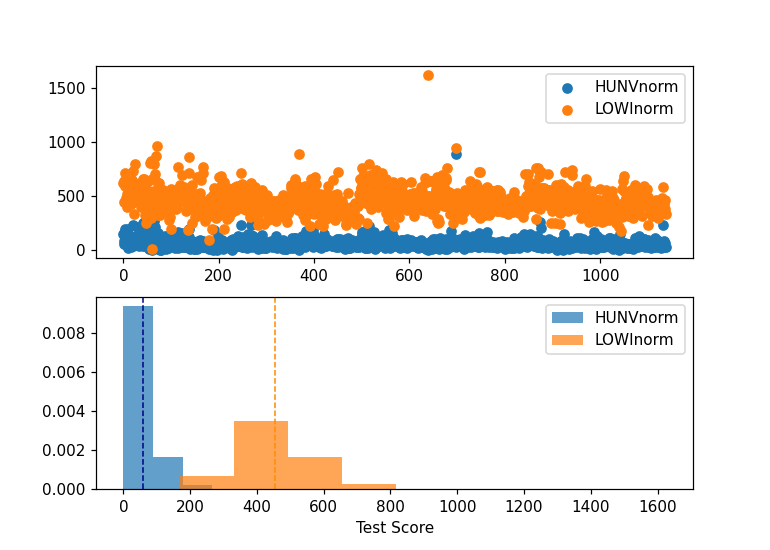

In [28]:
# Defining smaples for Independent TTest 
ip_sample1 = ip_fd2['HUNVnorm']
ip_sample2 = ip_fd2['LOWInorm']

# Scatter Plot of Data
plt.figure(figsize=(7,5))
plt.subplot(2, 1, 1)
plt.scatter(range(len(ip_sample1)), ip_sample1, label="HUNVnorm")
plt.scatter(range(len(ip_sample2)), ip_sample2, label="LOWInorm")
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)
plt.xlabel("Test Score")
plt.hist(ip_sample1, density=True, alpha=0.7, label="HUNVnorm")
plt.hist(ip_sample2, density=True, alpha=0.7, label="LOWInorm")
plt.axvline(ip_sample1.mean(), color='darkblue', linestyle='dashed', linewidth=1)
plt.axvline(ip_sample2.mean(), color='darkorange', linestyle='dashed', linewidth=1)
plt.legend(loc='upper right')

plt.savefig(os.path.join("..","output","Independent TTest for HUNVnorm vs LOWInorm in FD Score2.png"))

In [29]:
stats.ttest_ind(ip_sample1, ip_sample2)

Ttest_indResult(statistic=-104.71294681200597, pvalue=0.0)

## 1Sample TTest for HUNVnorm vs Total population

<IPython.core.display.Javascript object>


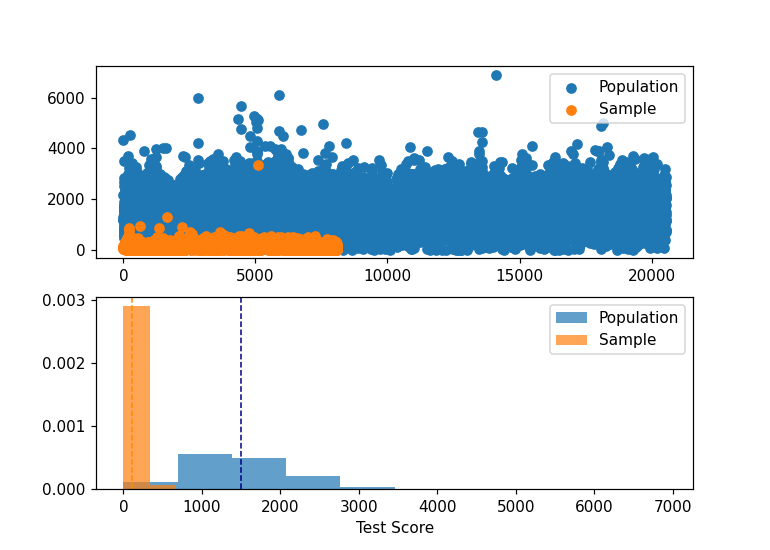

In [30]:
# Defining smaple and population for 1 Sample TTest
ip_pop_df = ip_final_df[ip_final_df['fd_score'] != 0]
ip_sample1 = ip_fd3['HUNVnorm']
ip_pop = ip_pop_df['OHU2010']

# Scatter and Histogram Plots of Data
plt.figure(figsize=(7,5))
plt.subplot(2, 1, 1)
plt.scatter(range(len(ip_pop)), ip_pop, label="Population")
plt.scatter(range(len(ip_sample1)), ip_sample1, label="Sample")
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)
plt.xlabel("Test Score")
plt.hist(ip_pop, density=True, alpha=0.7, label="Population")
plt.hist(ip_sample1, density=True, alpha=0.7, label="Sample")
plt.axvline(ip_pop.mean(), color='darkblue', linestyle='dashed', linewidth=1)
plt.axvline(ip_sample1.mean(), color='darkorange', linestyle='dashed', linewidth=1)
plt.legend(loc='upper right')

plt.savefig(os.path.join("..","output","1Sample TTest for HUNVnorm vs Total population.png"))

In [31]:
stats.ttest_1samp(ip_sample1, ip_pop.mean())

Ttest_1sampResult(statistic=-1325.408645783303, pvalue=0.0)

## Plotting Linear Correlation for HUNVnorm and FDS over the states

In [32]:
# Defining dataframes for food desert areas with score 1, 2, 3

ip_fd1_line = ip_final_df[ip_final_df['fd_score'] == 1]
ip_fd1_line = ip_fd1_line.groupby(['State']).sum()
ip_fd1_line = ip_fd1_line.reset_index()
ip_fd1_line = ip_fd1_line.sort_values(by=["HUNVnorm"], ascending=False)
ip_fd1_line = ip_fd1_line[: 40]

ip_fd2_line = ip_final_df[ip_final_df['fd_score'] == 2]
ip_fd2_line = ip_fd2_line.groupby(['State']).sum()
ip_fd2_line = ip_fd2_line.reset_index()
ip_fd2_line = ip_fd2_line.sort_values(by=["HUNVnorm"], ascending=False)
ip_fd2_line = ip_fd2_line[: 40]

ip_fd3_line = ip_final_df[ip_final_df['fd_score'] == 3]
ip_fd3_line = ip_fd3_line.groupby(['State']).sum()
ip_fd3_line = ip_fd3_line.reset_index()
ip_fd3_line = ip_fd3_line.sort_values(by=["HUNVnorm"], ascending=False)
ip_fd3_line = ip_fd3_line[: 40]

<IPython.core.display.Javascript object>


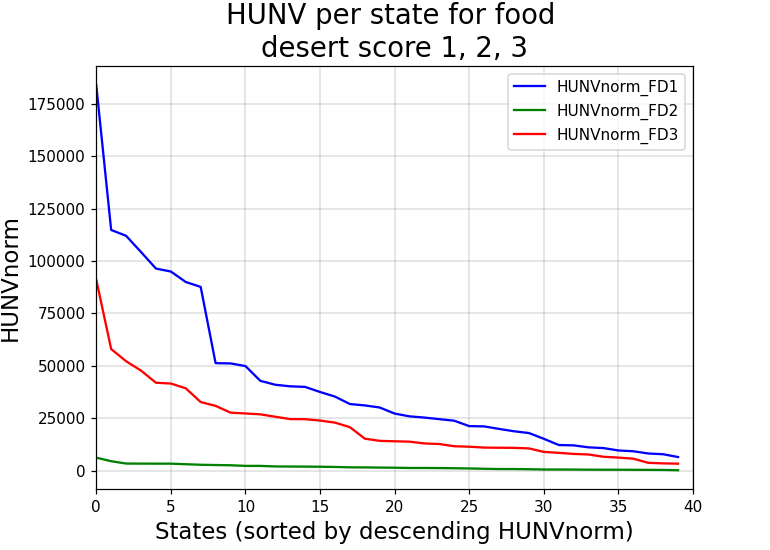

In [33]:
# Assigning data for x and y axes
x_axis = np.arange(len(ip_fd1_line["State"]))
fd1data = ip_fd1_line["HUNVnorm"]
fd2data = ip_fd2_line["HUNVnorm"]
fd3data = ip_fd3_line["HUNVnorm"]

# Plotting linear correlation plot
plt.figure(figsize=(7,5))
fd1 = plt.plot(x_axis, fd1data, marker="",color="blue", linewidth=1.5, label="HUNVnorm_FD1")
fd2 = plt.plot(x_axis, fd2data, marker="", color="Green", linewidth=1.5, label="HUNVnorm_FD2")
fd3 = plt.plot(x_axis, fd3data, marker="", color="red", linewidth=1.5, label="HUNVnorm_FD3")
plt.grid(linestyle='-',linewidth='0.25', color='grey')
plt.title('HUNV per state for food \ndesert score 1, 2, 3', fontsize = 18)
plt.xlabel("States (sorted by descending HUNVnorm)", fontsize = 15)
plt.ylabel("HUNVnorm", fontsize = 15)
plt.xlim(0, 40)
plt.legend(handles=[fd1[0], fd2[0], fd3[0]], loc="best")
plt.figsize=(15,7)
plt.show()

plt.savefig(os.path.join("..","output","Linear Correlation for HUNVnorm and FD Scores over the states.png"))

## Plotting Linear Correlation for HUNVnorm, LOWInorm and FDS over the states

<IPython.core.display.Javascript object>


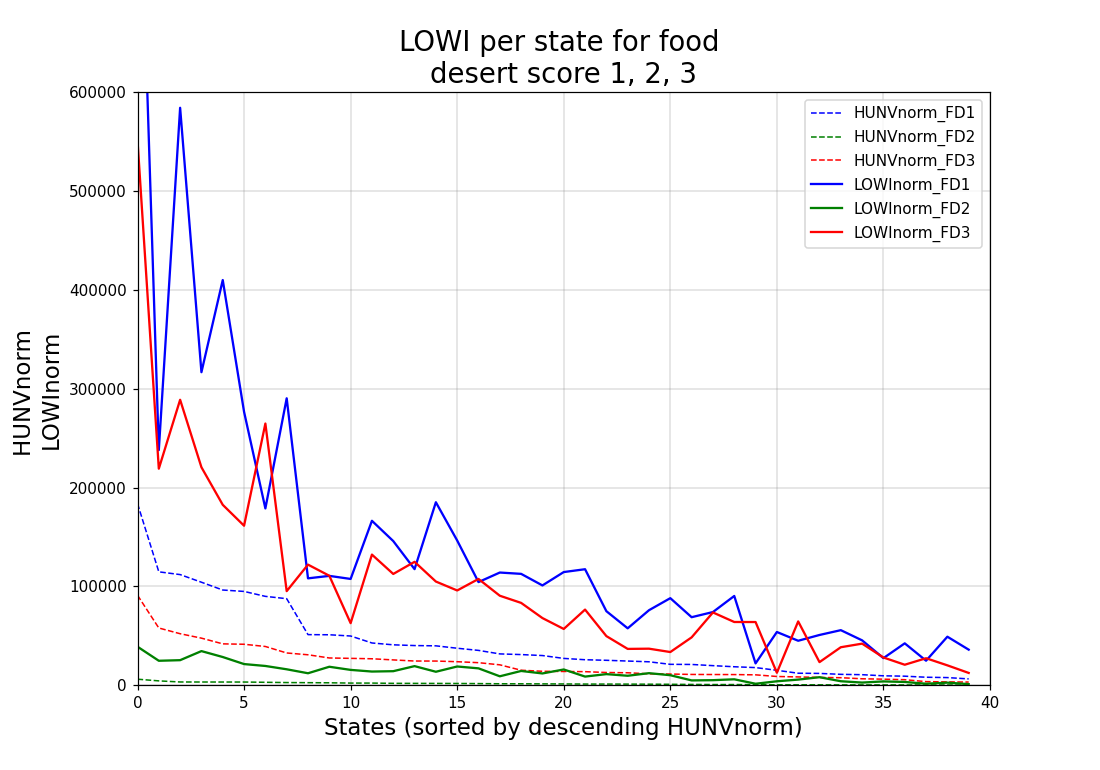

In [34]:
# Assigning data for x and y axes
x_axis = np.arange(len(ip_fd1_line["State"]))
fd1data1 = ip_fd1_line["LOWInorm"]
fd2data1 = ip_fd2_line["LOWInorm"]
fd3data1 = ip_fd3_line["LOWInorm"]

# Plotting linear correlation plot
plt.figure(figsize=(10,7))
fd1 = plt.plot(x_axis, fd1data, marker="",color="blue", linestyle='--', linewidth=1, label="HUNVnorm_FD1")
fd2 = plt.plot(x_axis, fd2data, marker="", color="green", linestyle='--', linewidth=1, label="HUNVnorm_FD2")
fd3 = plt.plot(x_axis, fd3data, marker="", color="red", linestyle='--', linewidth=1, label="HUNVnorm_FD3")
fd1a = plt.plot(x_axis, fd1data1, marker="",color="blue", linestyle='-', linewidth=1.5, label="LOWInorm_FD1")
fd2a = plt.plot(x_axis, fd2data1, marker="",color="green", linestyle='-', linewidth=1.5, label="LOWInorm_FD2")
fd3a = plt.plot(x_axis, fd3data1, marker="",color="red", linestyle='-', linewidth=1.5, label="LOWInorm_FD3")
plt.grid(linestyle='-',linewidth='0.25', color='grey')
plt.title('LOWI per state for food \ndesert score 1, 2, 3', fontsize = 18)
plt.xlabel("States (sorted by descending HUNVnorm)", fontsize = 15)
plt.ylabel("HUNVnorm \nLOWInorm", fontsize = 15)
plt.xlim(0, 40)
plt.ylim(0, 600000)
plt.legend(handles=[fd1[0], fd2[0], fd3[0], fd1a[0], fd2a[0], fd3a[0],], loc="best")
plt.show()

plt.savefig(os.path.join("..","output","Linear Correlation for LOWInorm and FD Scores over the states.png"))